In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
wine=pd.read_csv("winequality-red.csv",sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# to find null values
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# drop null values
wine.dropna(inplace=True)

In [9]:
wine.drop_duplicates(inplace=True)

In [10]:
#wine.drop(columns="type",inplace=True)

In [11]:
wine.shape

(1359, 12)

In [12]:
correlation=wine.corr()

Pearson correlation: The Pearson correlation is the most commonly used measurement for a linear relationship between two variables. The stronger the correlation between these two datasets, the closer it'll be to +1 or -1.

<AxesSubplot:>

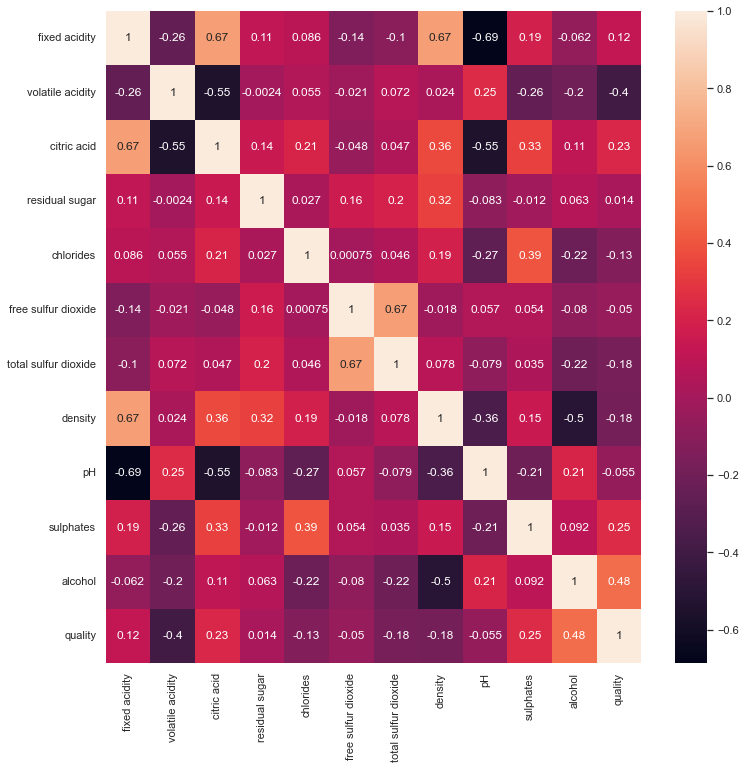

In [13]:

sns.set(rc={"figure.figsize":(12, 12)}) #width=3, #height=4
sns.heatmap(correlation,annot=True)

# Observation :- total sulfur dioxide and free sulfur dioxide are positive correlated

In [14]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [15]:
wine.quality.value_counts() # Quality :- 0,1,2 and 10 not present

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<BarContainer object of 6 artists>

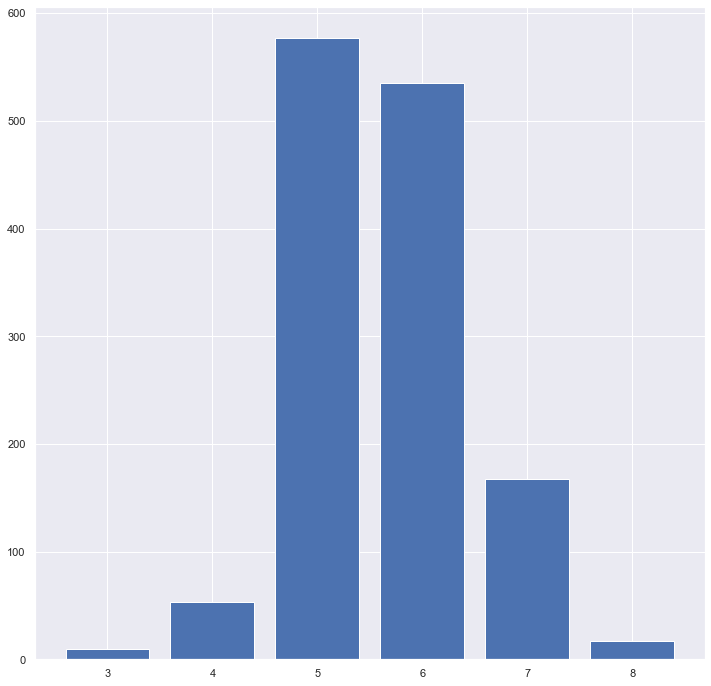

In [16]:
plt.bar(wine.quality.unique(),wine.quality.value_counts())

# Replacement of quality score with low,medium, high

group_Qulaity={3:"low" , 4: "low" , 5: "low" , 6: "medium" ,7: "high" , 8: "high" , 9: "high" }
wine["quality"]=wine["quality"].replace(group_Qulaity)

In [17]:
bins = (2,6.5,9)
group_names = ['low','high']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

<BarContainer object of 2 artists>

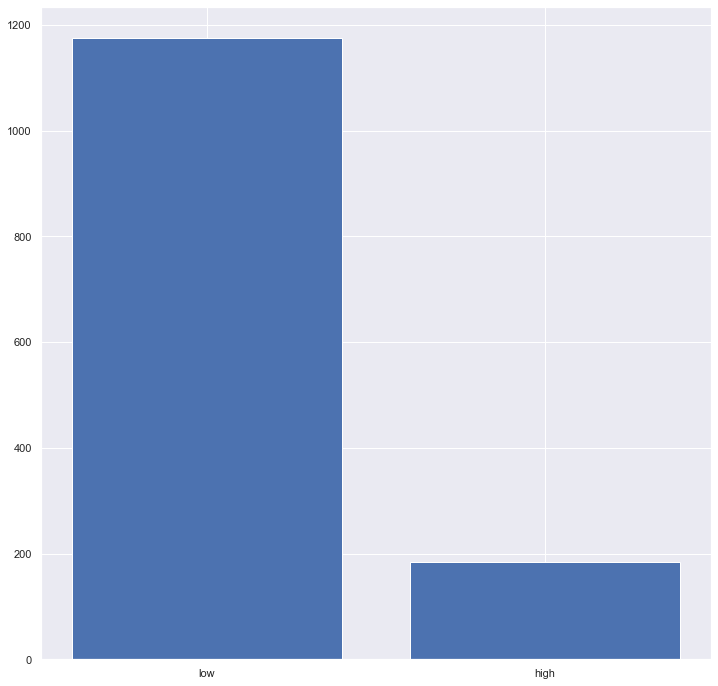

In [18]:
plt.bar(wine.quality.unique(),wine.quality.value_counts())

In [19]:
wine.quality.value_counts()

low     1175
high     184
Name: quality, dtype: int64

In [20]:
# For wine Quality - Label encoding
# label encode the target variable
wine.quality = LabelEncoder().fit_transform(wine.quality)

In [21]:
wine.quality.unique()

array([1, 0])

In [22]:
# Input
X=wine.drop("quality",axis=1)

# Output
y=wine.quality



# Encoding for Wine Type input
w_type={"white":1,"red":0}
X["type"]=X["type"].replace(to_replace=w_type)

# Dealing with Outliers
fixed acidity	residual sugar, free sulfur dioxide	total sulfur dioxide	

Text(0.5, 0, 'Fixed acidity')

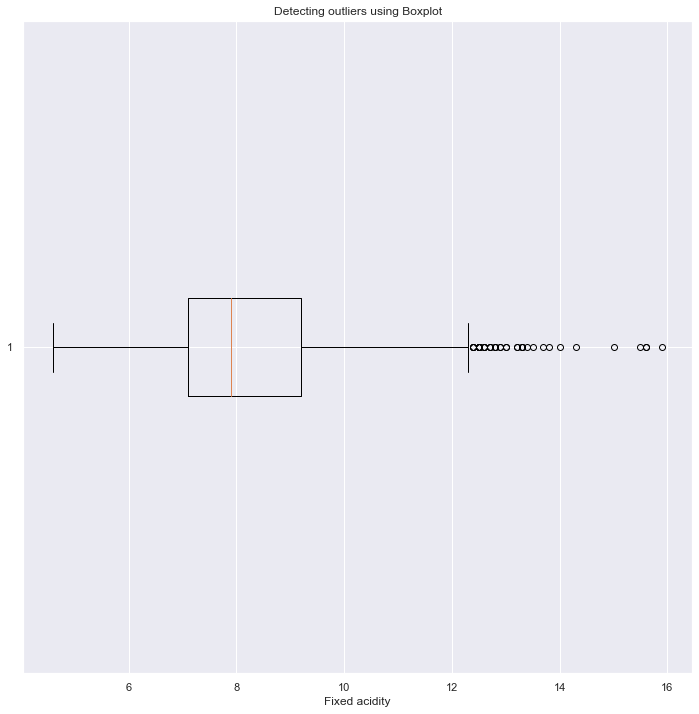

In [23]:
# Before handling Outliers
plt.boxplot(X["fixed acidity"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Fixed acidity')

In [24]:
X["fixed acidity"].quantile(0.25),X["fixed acidity"].quantile(0.75)
IQR=X["fixed acidity"].quantile(0.75)-X["fixed acidity"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["fixed acidity"].quantile(0.25)
Q3=X["fixed acidity"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

X["fixed acidity"].loc[X["fixed acidity"]<3.95]=Q1

X["fixed acidity"].loc[X["fixed acidity"]>12.3]=Q3

IQR : 2.0999999999999996
Q1 and Q3 :  7.1 9.2
whisker 1 and whisker 2 : 3.95 12.349999999999998


Text(0.5, 0, 'Fixed acidity')

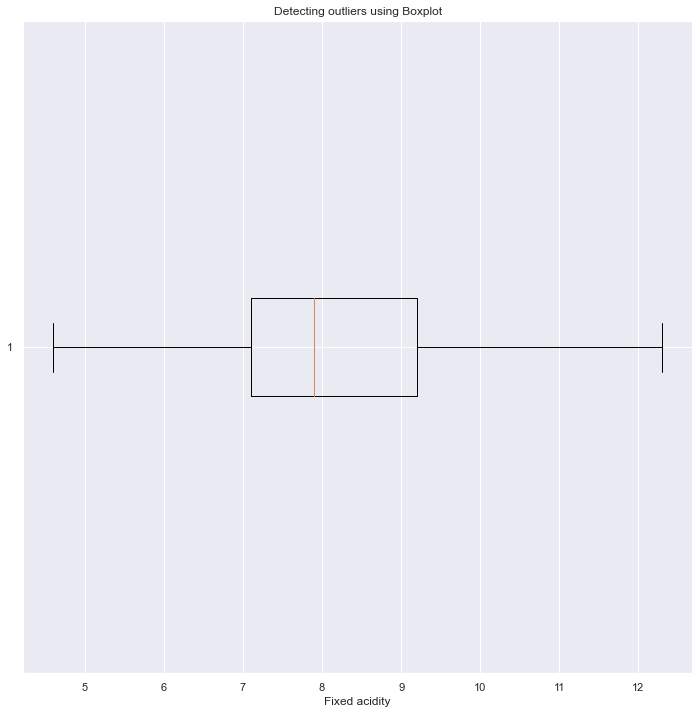

In [25]:
# After handling Outliers
plt.boxplot(X["fixed acidity"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Fixed acidity')

Text(0.5, 0, 'Residual Sugar')

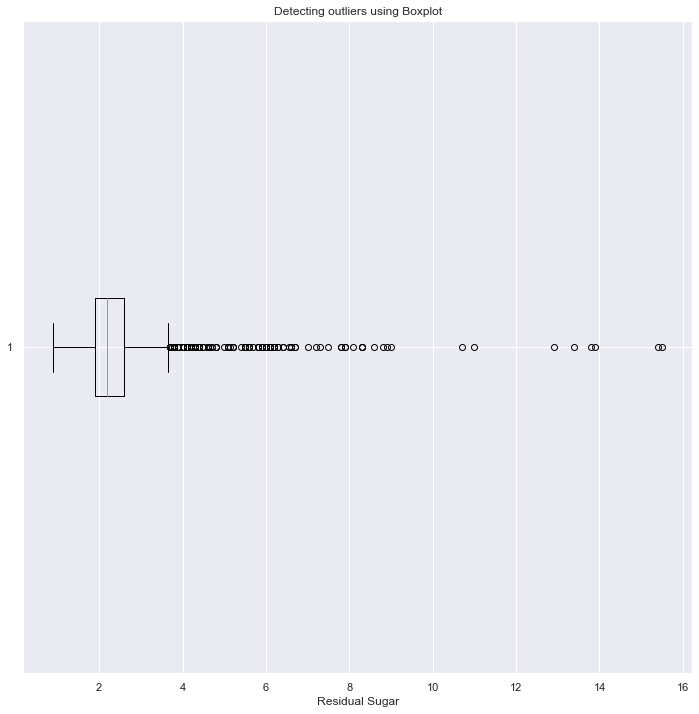

In [26]:
# Before handling Outliers
plt.boxplot(X["residual sugar"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Residual Sugar')

In [27]:
X["residual sugar"].quantile(0.25),X["residual sugar"].quantile(0.75)
IQR=X["residual sugar"].quantile(0.75)-X["residual sugar"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["residual sugar"].quantile(0.25)
Q3=X["residual sugar"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

X["residual sugar"].loc[X["residual sugar"]<0.84]=Q1

X["residual sugar"].loc[X["residual sugar"]>3.65]=Q3

IQR : 0.7000000000000002
Q1 and Q3 :  1.9 2.6
whisker 1 and whisker 2 : 0.8499999999999996 3.6500000000000004


Text(0.5, 0, 'Residual Sugar')

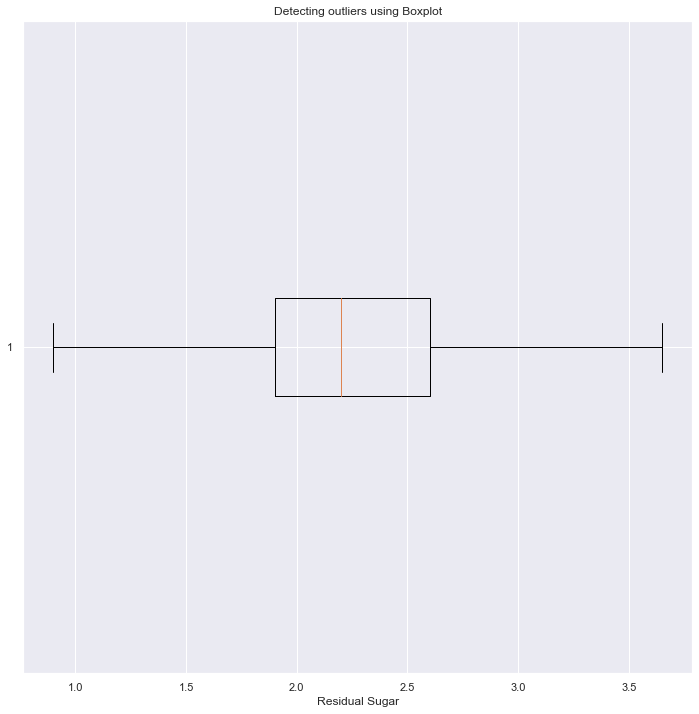

In [28]:
# After handling Outliers
plt.boxplot(X["residual sugar"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Residual Sugar')

Text(0.5, 0, 'Total sulfur dioxide')

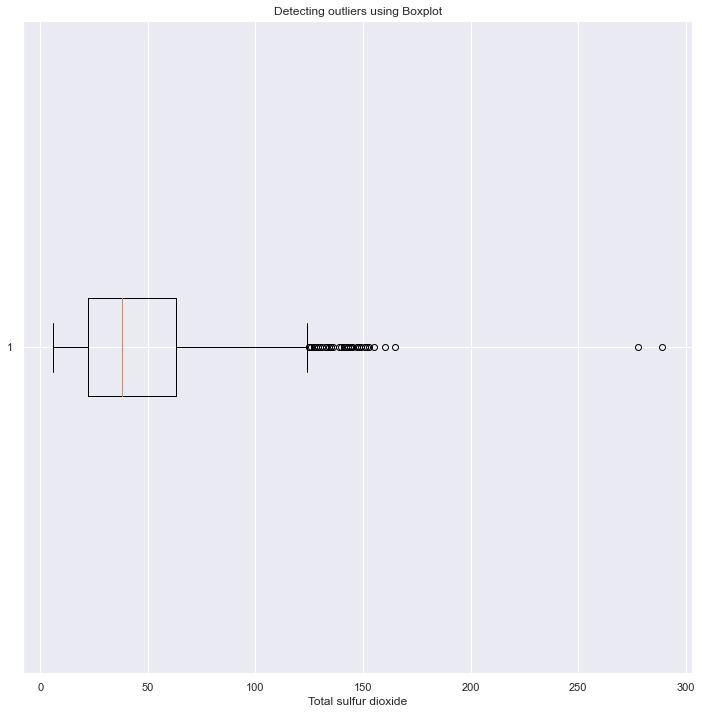

In [29]:
# Before handling Outliers
plt.boxplot(X["total sulfur dioxide"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Total sulfur dioxide')

In [30]:
X["total sulfur dioxide"].quantile(0.25),X["total sulfur dioxide"].quantile(0.75)
IQR=X["total sulfur dioxide"].quantile(0.75)-X["total sulfur dioxide"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["total sulfur dioxide"].quantile(0.25)
Q3=X["total sulfur dioxide"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

X["total sulfur dioxide"].loc[X["total sulfur dioxide"]<-39.5]=Q1

X["total sulfur dioxide"].loc[X["total sulfur dioxide"]>124.5]=Q3

IQR : 41.0
Q1 and Q3 :  22.0 63.0
whisker 1 and whisker 2 : -39.5 124.5


Text(0.5, 0, 'Total sulfur dioxide')

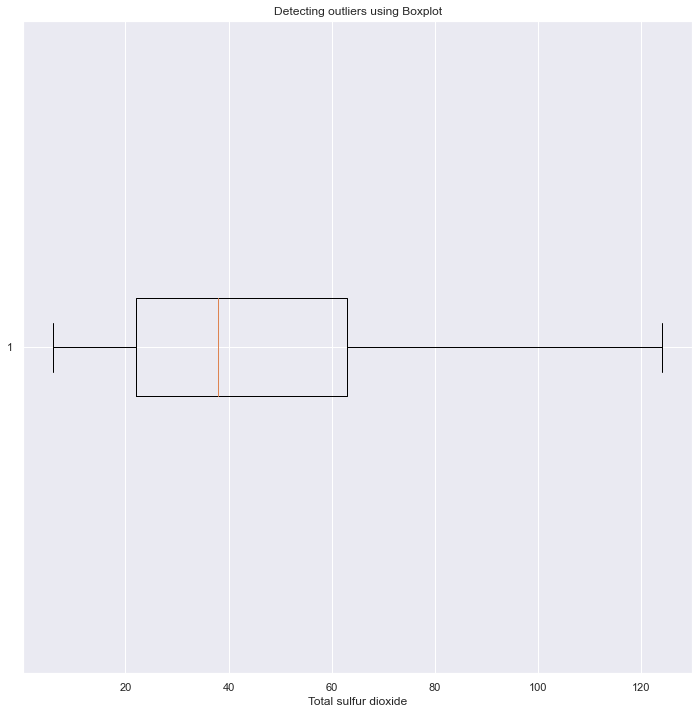

In [31]:
# After handling Outliers
plt.boxplot(X["total sulfur dioxide"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Total sulfur dioxide')

Text(0.5, 0, 'Free sulfur dioxide')

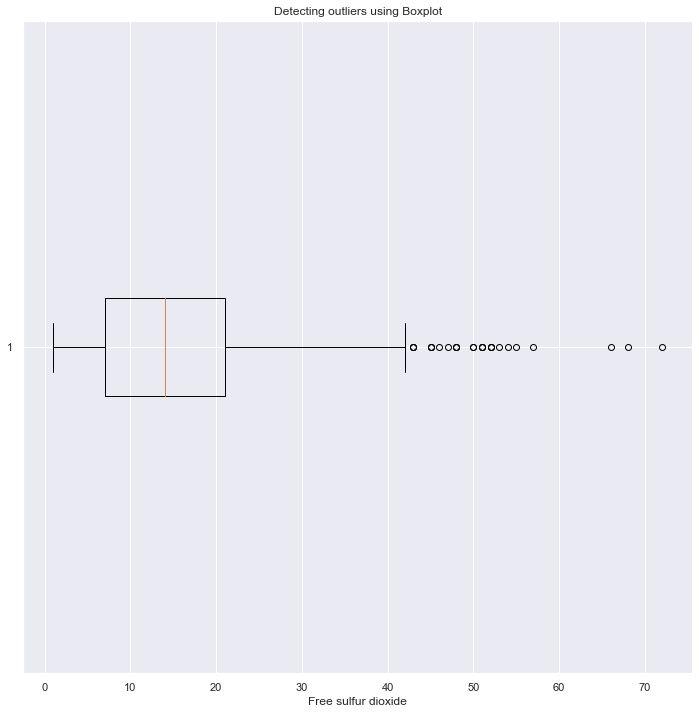

In [32]:
# Before handling Outliers
plt.boxplot(X["free sulfur dioxide"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Free sulfur dioxide')

In [33]:
X["free sulfur dioxide"].quantile(0.25),X["free sulfur dioxide"].quantile(0.75)
IQR=X["free sulfur dioxide"].quantile(0.75)-X["free sulfur dioxide"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["free sulfur dioxide"].quantile(0.25)
Q3=X["free sulfur dioxide"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

X["free sulfur dioxide"].loc[X["free sulfur dioxide"]<-14]=Q1

X["free sulfur dioxide"].loc[X["free sulfur dioxide"]>42]=Q3

IQR : 14.0
Q1 and Q3 :  7.0 21.0
whisker 1 and whisker 2 : -14.0 42.0


Text(0.5, 0, 'Free sulfur dioxide')

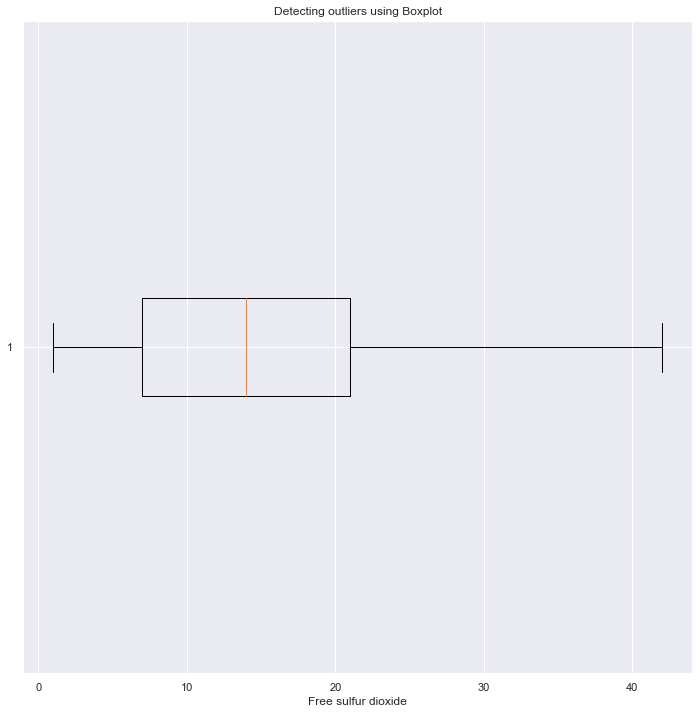

In [34]:
# After handling Outliers
plt.boxplot(X["free sulfur dioxide"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Free sulfur dioxide')

Text(0.5, 0, 'volatile acidity')

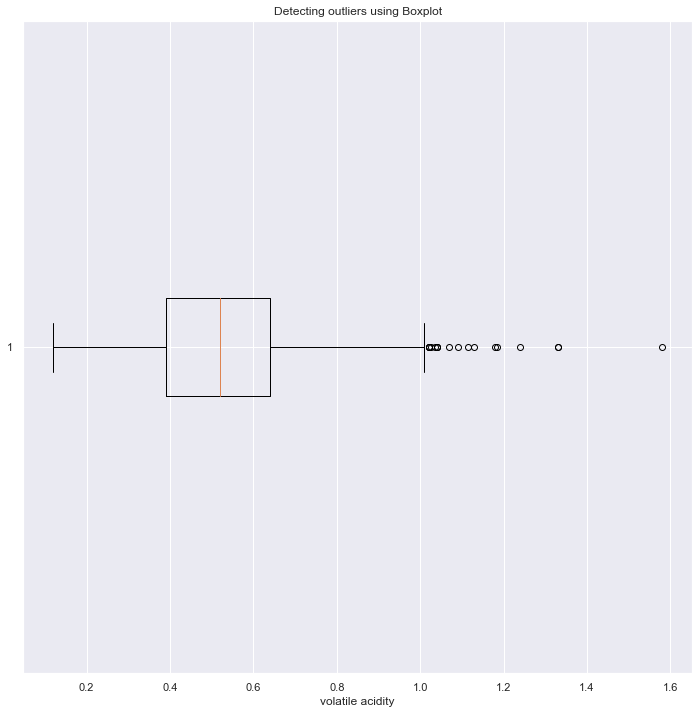

In [35]:
# Before handling Outliers
plt.boxplot(X["volatile acidity"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('volatile acidity')

In [36]:
X["volatile acidity"].quantile(0.25),X["volatile acidity"].quantile(0.75)
IQR=X["volatile acidity"].quantile(0.75)-X["volatile acidity"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["volatile acidity"].quantile(0.25)
Q3=X["volatile acidity"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

IQR : 0.25
Q1 and Q3 :  0.39 0.64
whisker 1 and whisker 2 : 0.015000000000000013 1.0150000000000001


In [37]:
X["volatile acidity"].loc[X["volatile acidity"]<0.015]=Q1

X["volatile acidity"].loc[X["volatile acidity"]>1.015]=Q3

Text(0.5, 0, 'volatile acidity')

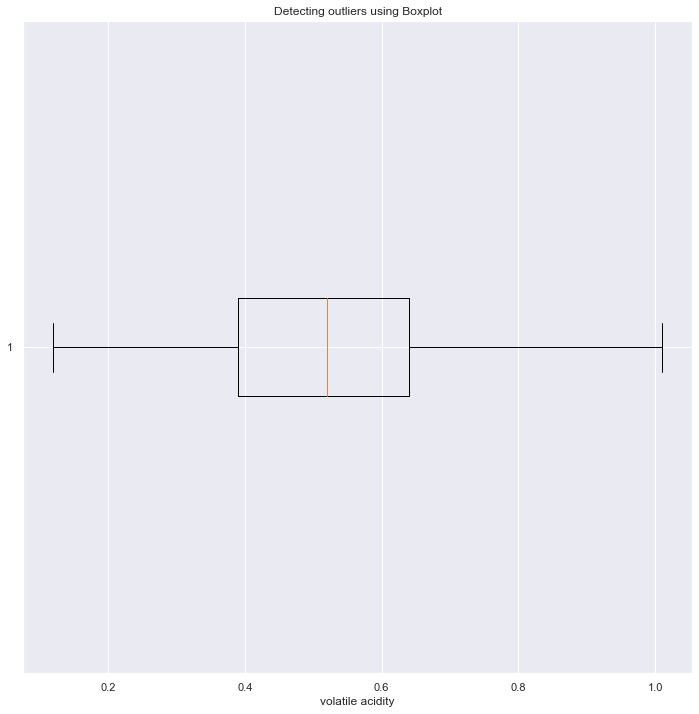

In [38]:
# After handling Outliers
plt.boxplot(X["volatile acidity"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('volatile acidity')

Text(0.5, 0, 'chlorides')

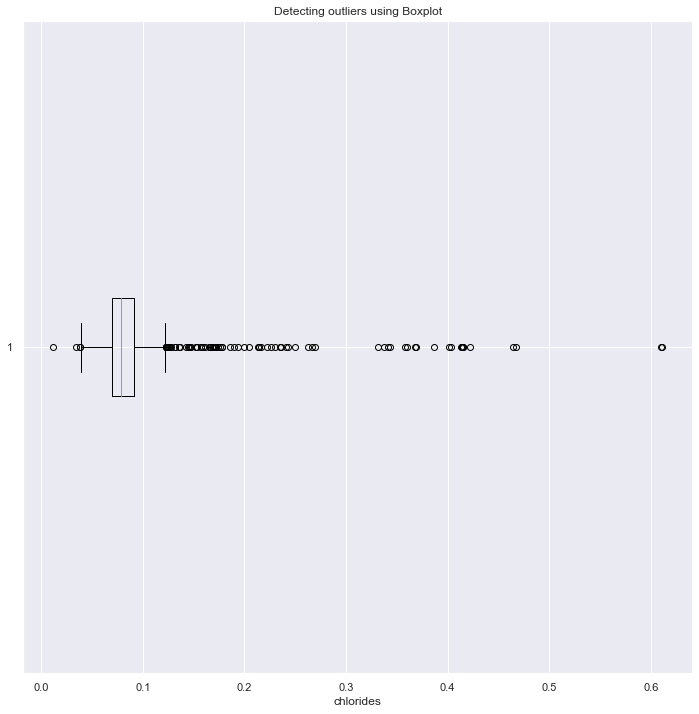

In [39]:
# Before handling Outliers
plt.boxplot(X["chlorides"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('chlorides')

In [40]:
X["chlorides"].quantile(0.25),X["chlorides"].quantile(0.75)
IQR=X["chlorides"].quantile(0.75)-X["chlorides"].quantile(0.25)
print("IQR :",IQR)

# whisker values
Q1=X["chlorides"].quantile(0.25)
Q3=X["chlorides"].quantile(0.75)
print("Q1 and Q3 : ",Q1,Q3)
whisker_value1=Q1-(1.5*IQR)
whisker_value2=Q3+(1.5*IQR)

print("whisker 1 and whisker 2 :",whisker_value1,whisker_value2)

IQR : 0.02099999999999999
Q1 and Q3 :  0.07 0.091
whisker 1 and whisker 2 : 0.03850000000000002 0.12249999999999998


In [41]:
X["chlorides"].loc[X["chlorides"]<0.038]=Q1

X["chlorides"].loc[X["chlorides"]>0.122]=Q3

Text(0.5, 0, 'chlorides')

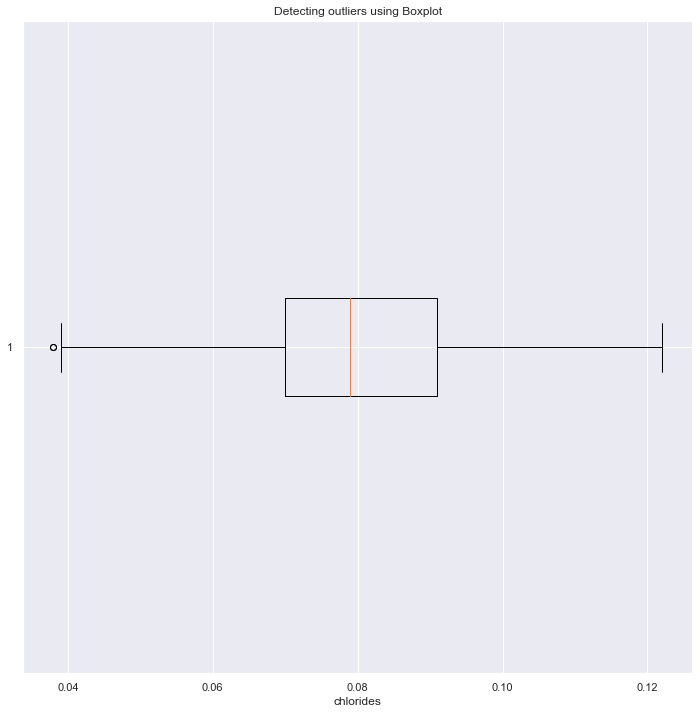

In [42]:
# After handling Outliers
plt.boxplot(X["chlorides"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('chlorides')

In [43]:

X.shape,y.shape

((1359, 11), (1359,))

In [44]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


# Balanced target variable y
(unique,count)=np.unique(y,return_counts=True)
frequencies=np.asarray((unique,count)).T
print(frequencies)

# Split data in Training and test data

In [45]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [46]:
X_train.shape,y_train.shape

((1087, 11), (1087,))

In [47]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6
1519,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2
452,6.8,0.56,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0
847,7.4,0.68,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0


# SMOTE - Class Imbalance

from collections import Counter
# check version number
import imblearn
from imblearn.over_sampling import SMOTE
print("The number of classes before fit {}".format(Counter(y_train)))
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print("The number of classes after fit {}".format(Counter(y_train)))

# lets plot SMOTE
pd.value_counts(y_train).plot.bar()
plt.title("SMOTE- Class Balance")
plt.xlabel("Class")
plt.ylabel("Frequency")
pd.value_counts(y_train)
#oversample.plt.bar(X_train, Counter(y_train))

# Feature Selection

In [48]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
# generate dataset
#X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=mutual_info_classif, k=11) # f_classif

In [49]:
# apply feature selection
print(fs)
X_train = fs.fit_transform(X_train, y_train)
print(X_train.shape)

SelectKBest(k=11, score_func=<function mutual_info_classif at 0x7f9da39c2b80>)
(1087, 11)


In [50]:
# ANOVA correlation coefficient (linear) -Selected top 5 important features
X_train
# type	volatile acidity	chlorides	density	alcohol

array([[ 8.9 ,  0.38,  0.4 , ...,  3.27,  0.75, 12.6 ],
       [ 6.6 ,  0.7 ,  0.08, ...,  3.44,  0.58, 10.2 ],
       [ 6.8 ,  0.56,  0.03, ...,  3.44,  0.63, 10.  ],
       ...,
       [ 6.8 ,  0.47,  0.08, ...,  3.3 ,  0.65,  9.6 ],
       [ 8.9 ,  0.32,  0.31, ...,  3.17,  0.55, 10.4 ],
       [ 9.1 ,  0.34,  0.42, ...,  3.18,  0.55, 11.4 ]])

# Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler=StandardScaler()
#scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.49373571, -0.85732581,  0.64877105, ..., -0.25982192,
         0.51985077,  1.98424001],
       [-1.05719864,  1.07166419, -0.98983279, ...,  0.85726724,
        -0.45848943, -0.2158671 ],
       [-0.92233478,  0.22773107, -1.24586464, ...,  0.85726724,
        -0.17074231, -0.39920936],
       ...,
       [-0.92233478, -0.31479737, -0.98983279, ..., -0.06268854,
        -0.05564346, -0.76589387],
       [ 0.49373571, -1.21901143,  0.18791372, ..., -0.91693319,
        -0.6311377 , -0.03252484],
       [ 0.62859957, -1.09844956,  0.75118379, ..., -0.85122206,
        -0.6311377 ,  0.88418646]])

# Model Creation using Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes importMultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report

In [54]:
gnb = GaussianNB()
#gnb =MultinomialNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [55]:
print("Training Accuracy :",gnb.score(X_train, y_train))

Training Accuracy : 0.8445262189512419


In [56]:
# Feature Selection 
X_test = fs.transform(X_test)
print(X_test.shape)

(272, 11)


In [57]:
# Feature Scaling on X_test
X_test=scaler.transform(X_test)
X_test

array([[-0.31544743,  0.58941669, -1.19465827, ...,  0.20015597,
        -0.74623655, -0.857565  ],
       [ 0.02171221,  0.6798381 , -0.88742005, ..., -0.12839966,
         0.51985077,  0.42583081],
       [ 0.15657607, -0.91760675,  0.80239016, ..., -0.91693319,
         0.86514732,  0.7008442 ],
       ...,
       [ 0.49373571, -0.73676393,  0.23912009, ...,  0.46300048,
         0.63494962,  0.05914629],
       [-1.86638178, -0.61620206, -0.01691176, ...,  3.09144557,
        -0.11319289,  1.70922662],
       [ 0.02171221,  0.40857388, -1.39948375, ...,  1.25153401,
        -0.05564346, -1.04090726]])

In [58]:
y_pred_gnb = gnb.predict(X_test)
#y_prob_pred_gnb = gnb.predict_proba(X_test)
# how did our model perform?
#count_misclassified = (y_test != y_pred_gnb).sum()

print("GaussianNB")
#print("=" * 30)
#print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_gnb)
print('Accuracy: {:.2f}'.format(accuracy))

GaussianNB
Accuracy: 0.86


In [59]:
#Recall, Precision, and F1 score for GaussianNB

print("Recall score : ", recall_score(y_test, y_pred_gnb , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_gnb , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_gnb , average='micro'))

Recall score :  0.8639705882352942
Precision score :  0.8639705882352942
F1 score :  0.8639705882352942


In [60]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
print('Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
y_pred_rand=forest.predict(X_test)
print('Random Forest Classifier Testing Accuracy:', forest.score(X_test, y_test))
accuracy = accuracy_score(y_test, y_pred_rand)
print(accuracy)

Random Forest Classifier Training Accuracy: 0.9935602575896965
Random Forest Classifier Testing Accuracy: 0.9044117647058824
0.9044117647058824


In [61]:
#classification_report for GaussianNB

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.47      0.65      0.54        34
           1       0.95      0.89      0.92       238

    accuracy                           0.86       272
   macro avg       0.71      0.77      0.73       272
weighted avg       0.89      0.86      0.87       272



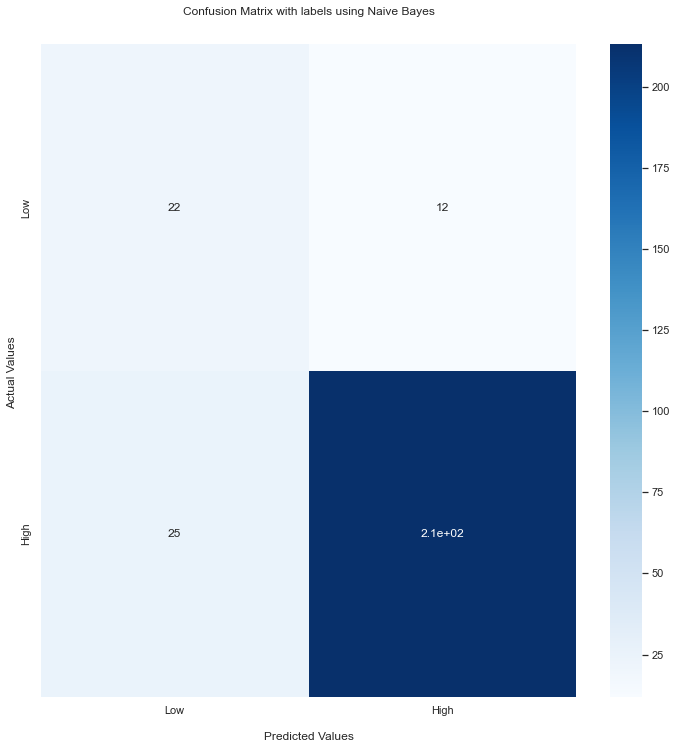

In [62]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gnb)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels using Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low','High'])
ax.yaxis.set_ticklabels(['Low','High'])

## Display the visualization of the Confusion Matrix.
plt.show()

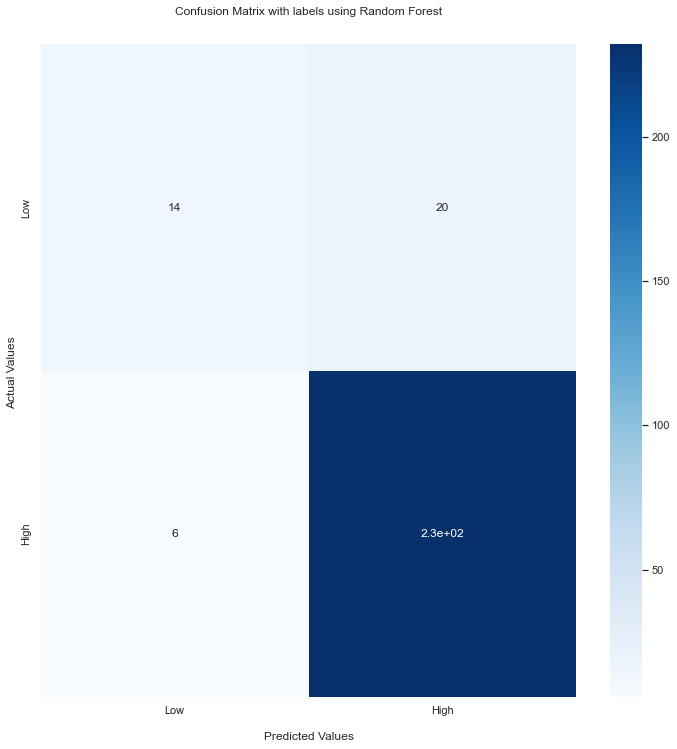

In [63]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rand)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels using Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low','High'])
ax.yaxis.set_ticklabels(['Low','High'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [64]:
#classification_report for Random Forest

print(classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        34
           1       0.92      0.97      0.95       238

    accuracy                           0.90       272
   macro avg       0.81      0.69      0.73       272
weighted avg       0.89      0.90      0.89       272



In [65]:
from collections import Counter
print(Counter(y_test))
print(Counter(y_pred_gnb))
print(Counter(y_pred_rand))

Counter({1: 238, 0: 34})
Counter({1: 225, 0: 47})
Counter({1: 252, 0: 20})
